In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

In [321]:
df = pd.read_csv('./data/train_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income>50K      25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [322]:
string_columns = df.select_dtypes('object').keys()
df[string_columns] = df[string_columns].astype('category').apply(lambda x: x.cat.codes)
df['made_money'] = (df['capital.gain']> 0).astype(np.int)
df['loaded'] = (df['capital.gain'] == 99_999).astype(int)
df['full_time'] = (df['hours.per.week'] >= 40).astype(int)
df['fnlwgt'] = (df.fnlwgt - df.fnlwgt.mean()) / df.fnlwgt.std()
df['fnlwgt_squared'] = df['fnlwgt'] ** 2
df = df.rename(columns={'income>50K': 'LABEL'})

LABEL = df.pop('LABEL')
df['LABEL'] = LABEL
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             25000 non-null  int64  
 1   workclass       25000 non-null  int8   
 2   fnlwgt          25000 non-null  float64
 3   education       25000 non-null  int8   
 4   education.num   25000 non-null  int64  
 5   marital.status  25000 non-null  int8   
 6   occupation      25000 non-null  int8   
 7   relationship    25000 non-null  int8   
 8   race            25000 non-null  int8   
 9   sex             25000 non-null  int8   
 10  capital.gain    25000 non-null  int64  
 11  capital.loss    25000 non-null  int64  
 12  hours.per.week  25000 non-null  int64  
 13  native.country  25000 non-null  int8   
 14  made_money      25000 non-null  int32  
 15  loaded          25000 non-null  int32  
 16  full_time       25000 non-null  int32  
 17  fnlwgt_squared  25000 non-null 

In [323]:
test_df = pd.read_csv('./data/test_final.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23842 entries, 0 to 23841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              23842 non-null  int64 
 1   age             23842 non-null  int64 
 2   workclass       23842 non-null  object
 3   fnlwgt          23842 non-null  int64 
 4   education       23842 non-null  object
 5   education.num   23842 non-null  int64 
 6   marital.status  23842 non-null  object
 7   occupation      23842 non-null  object
 8   relationship    23842 non-null  object
 9   race            23842 non-null  object
 10  sex             23842 non-null  object
 11  capital.gain    23842 non-null  int64 
 12  capital.loss    23842 non-null  int64 
 13  hours.per.week  23842 non-null  int64 
 14  native.country  23842 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.7+ MB


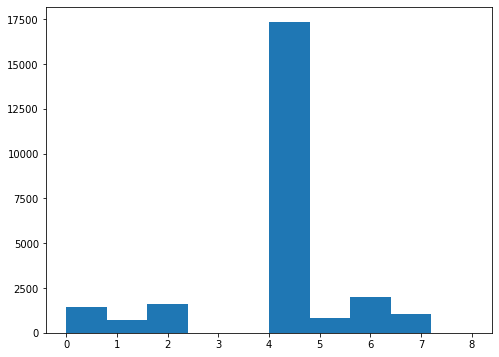

In [324]:
plt.figure(figsize=(8,6))
plt.hist(df.workclass)
plt.show()

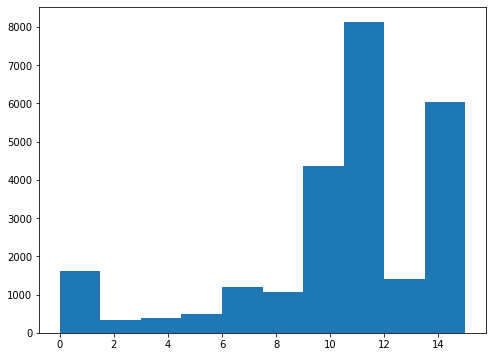

In [325]:
plt.figure(figsize=(8,6))
plt.hist(df.education)
plt.show()

In [326]:
print(np.std(df[df.LABEL == 0].fnlwgt ** 2))
print(np.std(df[df.LABEL == 1].fnlwgt ** 2))

3.171695906619158
2.1528684586457767


label 0 std: 1.6167240858922576, label 1 std: 1.2823487187085791


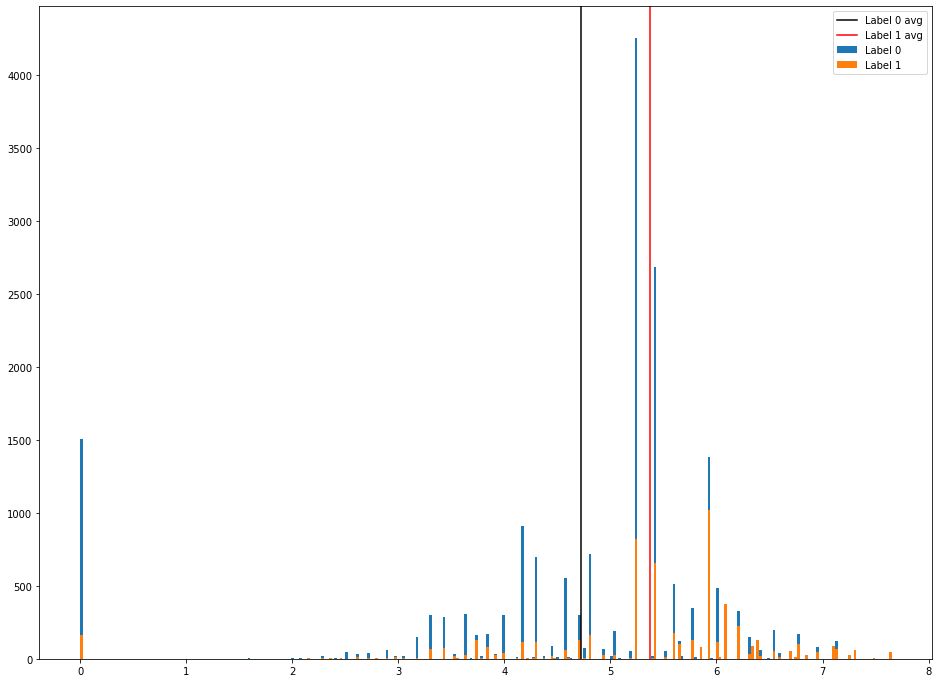

In [380]:
avg = df.fnlwgt.mean()
std = df.fnlwgt.std()

df['feature'] = (df['education.num'] * df['workclass'] * df['race']) ** (1/3)

LABEL_0 = df[df.LABEL == 0].feature
LABEL_1 = df[df.LABEL == 1].feature

print(f"label 0 std: {LABEL_0.std()}, label 1 std: {LABEL_1.std()}")

plt.figure(figsize=(16,12))
plt.hist(LABEL_0, bins=300, label='Label 0')
plt.hist(LABEL_1, bins=300, label='Label 1')
plt.axvline(LABEL_0.mean(), label='Label 0 avg', c='black')
plt.axvline(LABEL_1.mean(), label='Label 1 avg', c='red')
plt.legend()
plt.show()

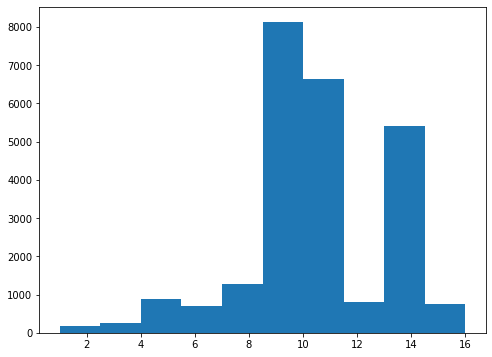

In [357]:
plt.figure(figsize=(8,6))
plt.hist(df['education.num'])
plt.show()

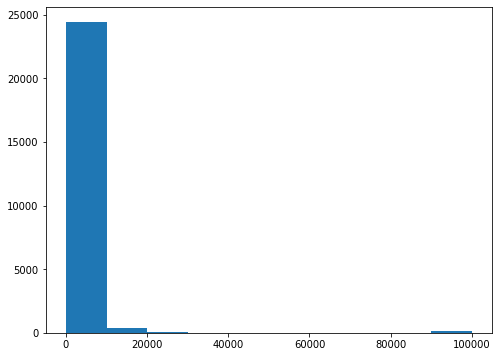

In [358]:
plt.figure(figsize=(8,6))
plt.hist(df['capital.gain'])
plt.show()

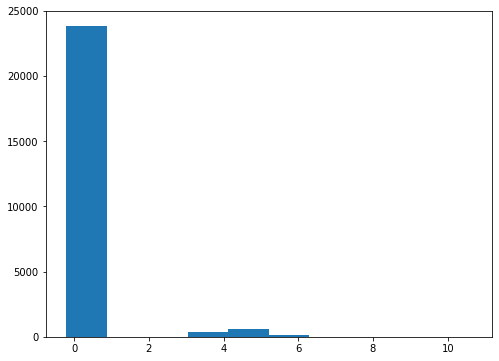

In [359]:
plt.figure(figsize=(8,6))
plt.hist((df['capital.loss'] - df['capital.loss'].mean()) / df['capital.loss'].std())
plt.show()

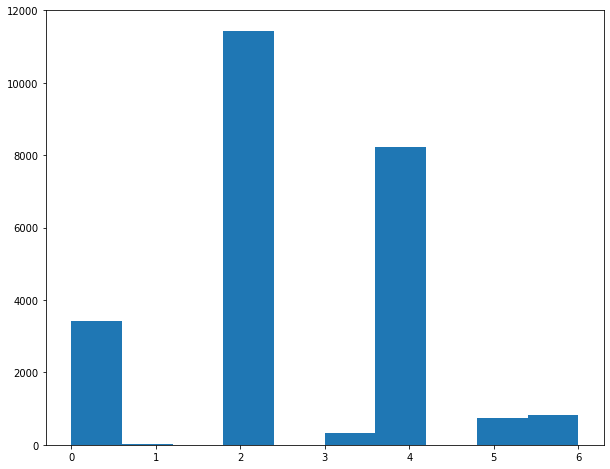

In [360]:
plt.figure(figsize=(10,8))
plt.hist(df['marital.status'])
plt.show()

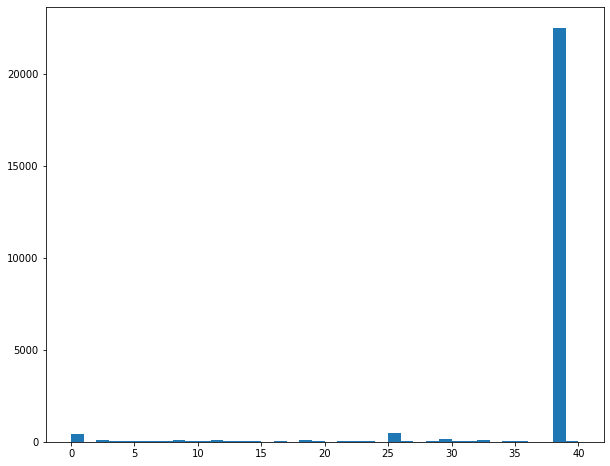

In [361]:
plt.figure(figsize=(10,8))
plt.hist(df['native.country'], bins=40)
plt.show()

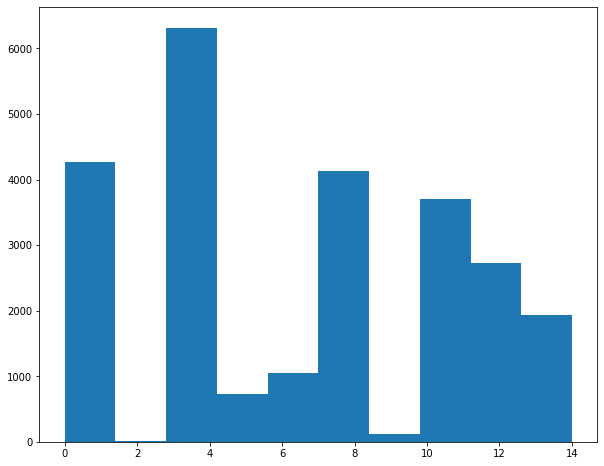

In [362]:
plt.figure(figsize=(10,8))
plt.hist(df['occupation'])
plt.show()

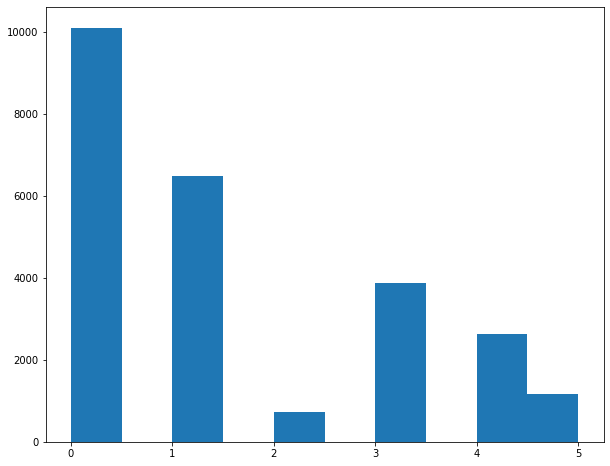

In [363]:
plt.figure(figsize=(10,8))
plt.hist(df['relationship'])
plt.show()

<AxesSubplot:>

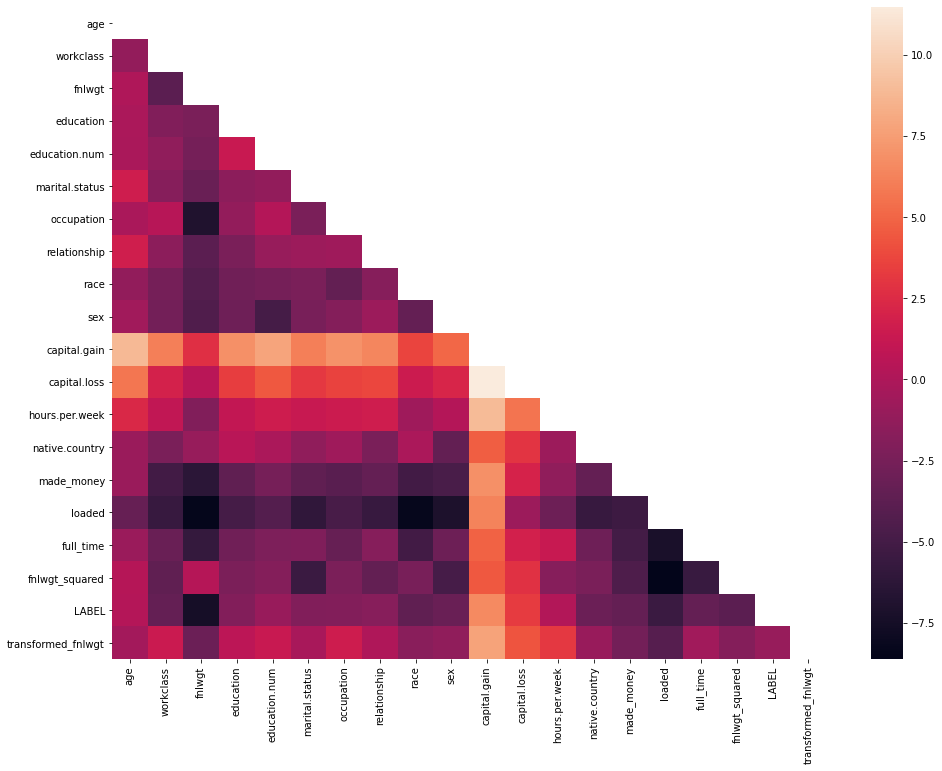

In [364]:
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(df.cov(), dtype=bool))
sns.heatmap(np.log(np.abs(df.cov())), mask=mask)

<AxesSubplot:>

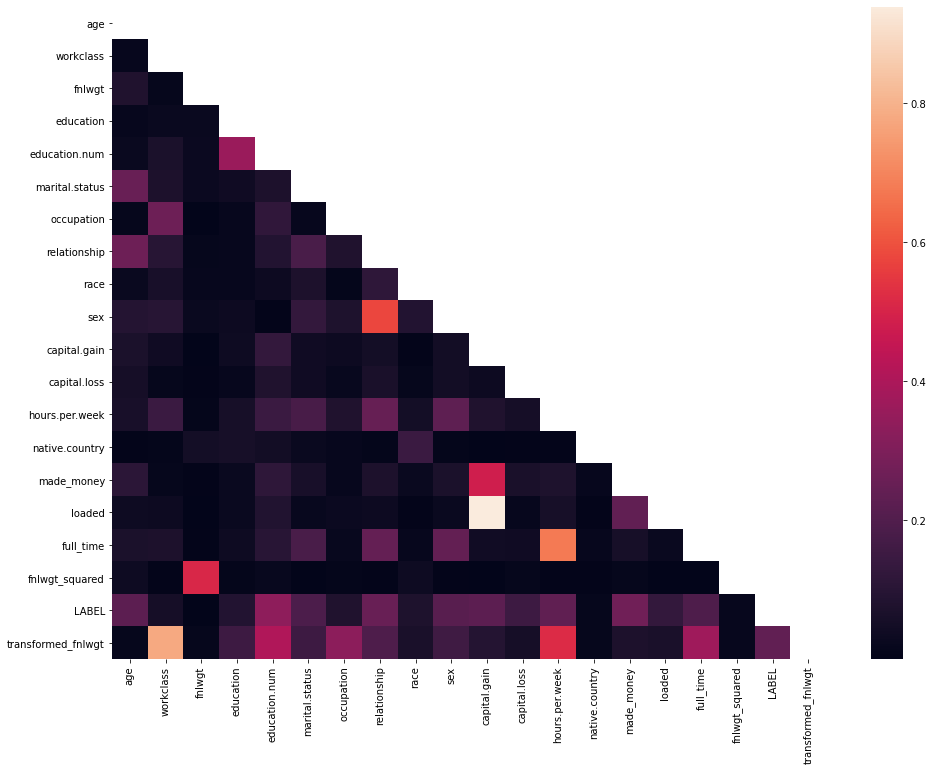

In [365]:
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(np.abs(df.corr()), mask=mask)

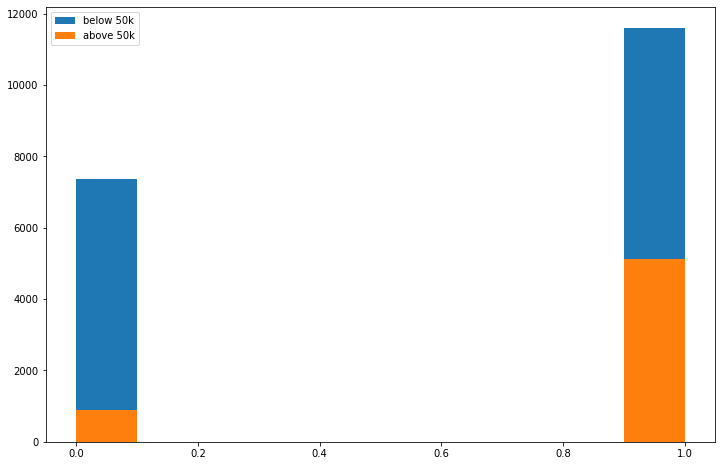

In [366]:
plt.figure(figsize=(12,8))
plt.hist(df[df.LABEL==0].sex, label='below 50k')
plt.hist(df[df.LABEL==1].sex, label='above 50k')
plt.legend()
plt.show()

In [367]:
plt.figure(figsize=(12,8))
plt.hist(df[df.in_US==1].LABEL, label='In US')
plt.hist(df[df.in_US==0].LABEL, label='Not in US')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'in_US'

<Figure size 864x576 with 0 Axes>

In [ ]:
for i in range(5):
    race_df = df[df.race == i]
    print(f"Race: {i}, Race 50kpct: {race_df[race_df.LABEL == 1].shape[0] / race_df.shape[0]}")

Race: 0, Race 50kpct: 0.12062256809338522
Race: 1, Race 50kpct: 0.2634207240948814
Race: 2, Race 50kpct: 0.11665257819103973
Race: 3, Race 50kpct: 0.14285714285714285
Race: 4, Race 50kpct: 0.25595767592115737


In [ ]:
for i in range(15):
    education_df = df[df.education == i]
    print(f"education: {i}, education 50kpct: {education_df[education_df.LABEL == 1].shape[0] / education_df.shape[0]}")

education: 0, education 50kpct: 0.06531204644412192
education: 1, education 50kpct: 0.045989304812834225
education: 2, education 50kpct: 0.07507507507507508
education: 3, education 50kpct: 0.022058823529411766
education: 4, education 50kpct: 0.05
education: 5, education 50kpct: 0.06313645621181263
education: 6, education 50kpct: 0.05454545454545454
education: 7, education 50kpct: 0.26354679802955666
education: 8, education 50kpct: 0.24739336492890995
education: 9, education 50kpct: 0.40578635014836795
education: 10, education 50kpct: 0.7719869706840391
education: 11, education 50kpct: 0.16061091267397462
education: 12, education 50kpct: 0.5551497443389335
education: 13, education 50kpct: 0.022727272727272728
education: 14, education 50kpct: 0.7555555555555555


(array([1624.,  333.,  396.,  491., 1197., 1055., 4351., 8119., 1413.,
        6021.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

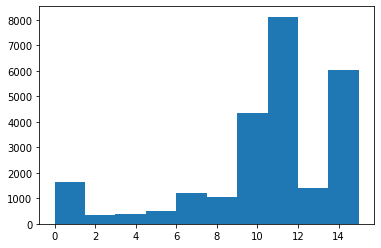

In [ ]:
plt.hist(df.education)